In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes (1).csv to diabetes (1).csv


In [3]:
import pandas as pd

data = pd.read_csv('diabetes (1).csv')

In [4]:
df=pd.read_csv('diabetes (1).csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [7]:
X=df.drop('Outcome', axis=1)
y= df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
dt_model = DecisionTreeClassifier(max_depth=4, min_samples_split=5, random_state=42)
dt_model.fit(X_train, y_train)


y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.8051948051948052
Confusion Matrix:
 [[89 11]
 [19 35]]
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.86       100
           1       0.76      0.65      0.70        54

    accuracy                           0.81       154
   macro avg       0.79      0.77      0.78       154
weighted avg       0.80      0.81      0.80       154



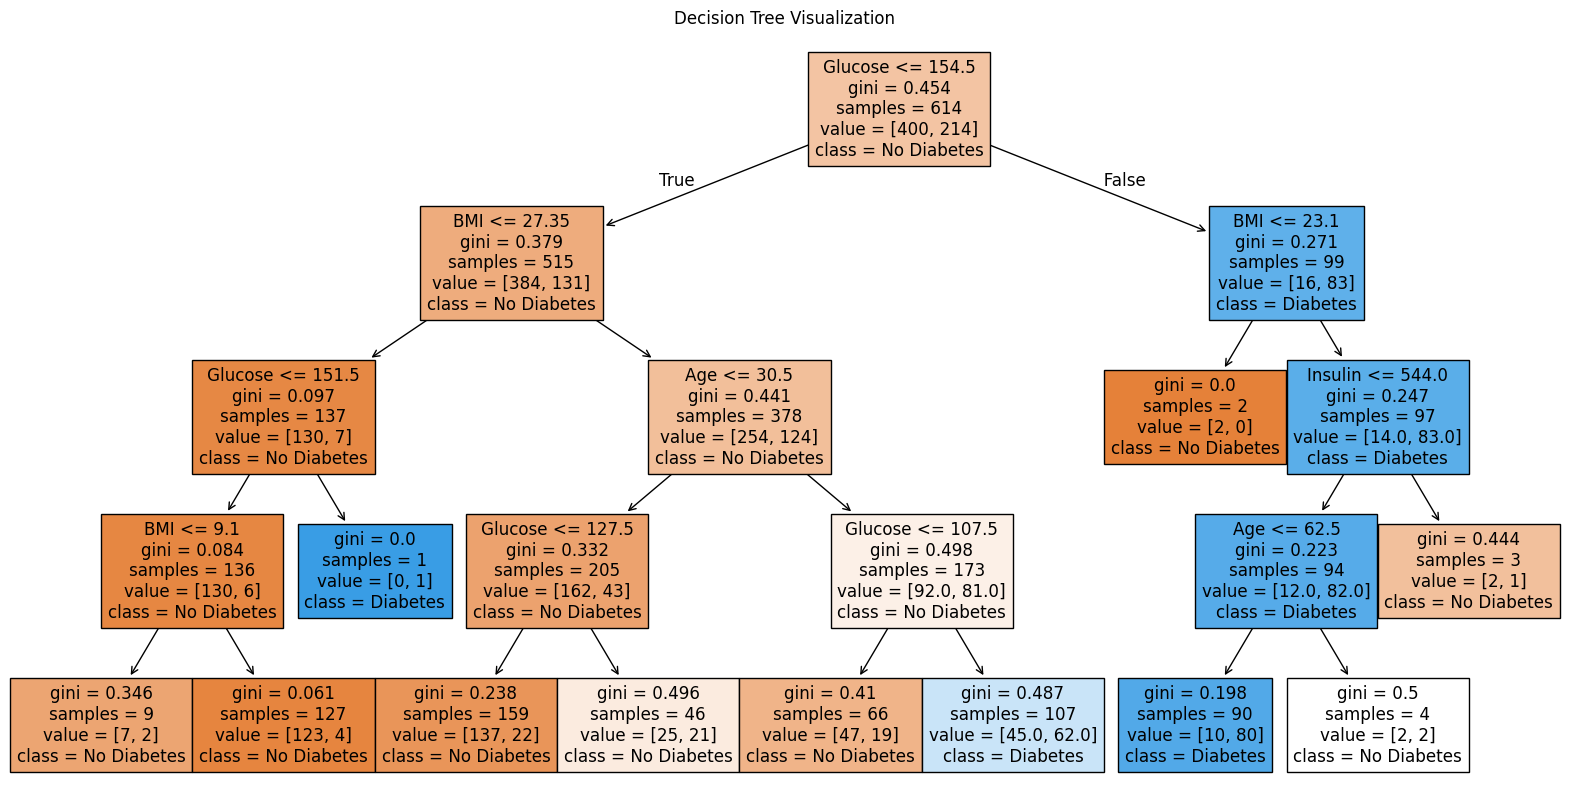

In [8]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Diabetes", "Diabetes"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()